# Actividad 4.2

2. Aleatorato. En estos ejercicios la señal varía continuamente. Demodular la señal.Discutan la elección del tiempo de integración. ¿Cómo pueden asegurarse de que no están sobre o sub filtrando? Discutir cualitativamente la relación entre la señal demodulada y la envolvente de la medición en cada caso.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

datos1 = np.loadtxt("data/v1/ej21_medicion.txt")
datos2 = np.loadtxt("data/v1/ej22_medicion.txt")

Visualizamos los datos

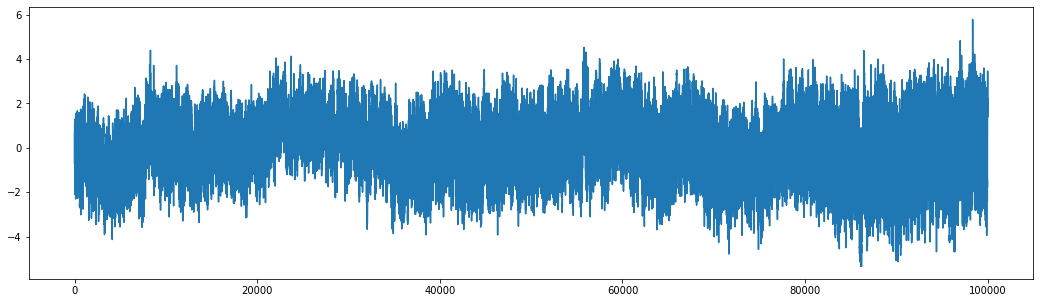

In [2]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(datos1)
plt.show()

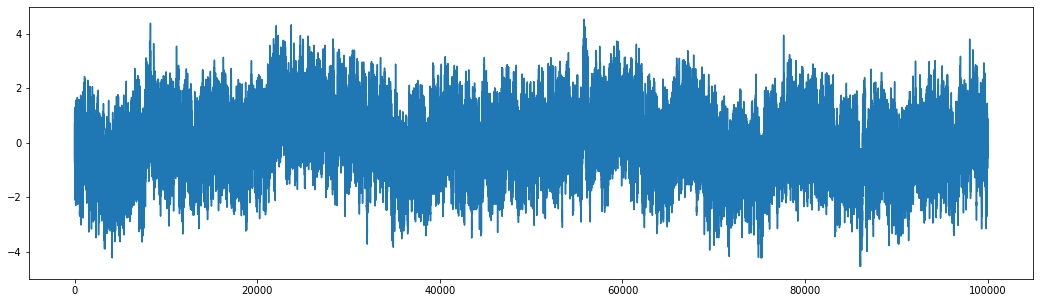

In [3]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(18,5))
ax.plot(datos2)
plt.show()

In [4]:
fsamp = 100000
fmod = 1400.3

muestras=len(datos1)

periodo = 1/fsamp

t = np.linspace(0, muestras-1, muestras)*periodo

tiempo_max = muestras/fsamp


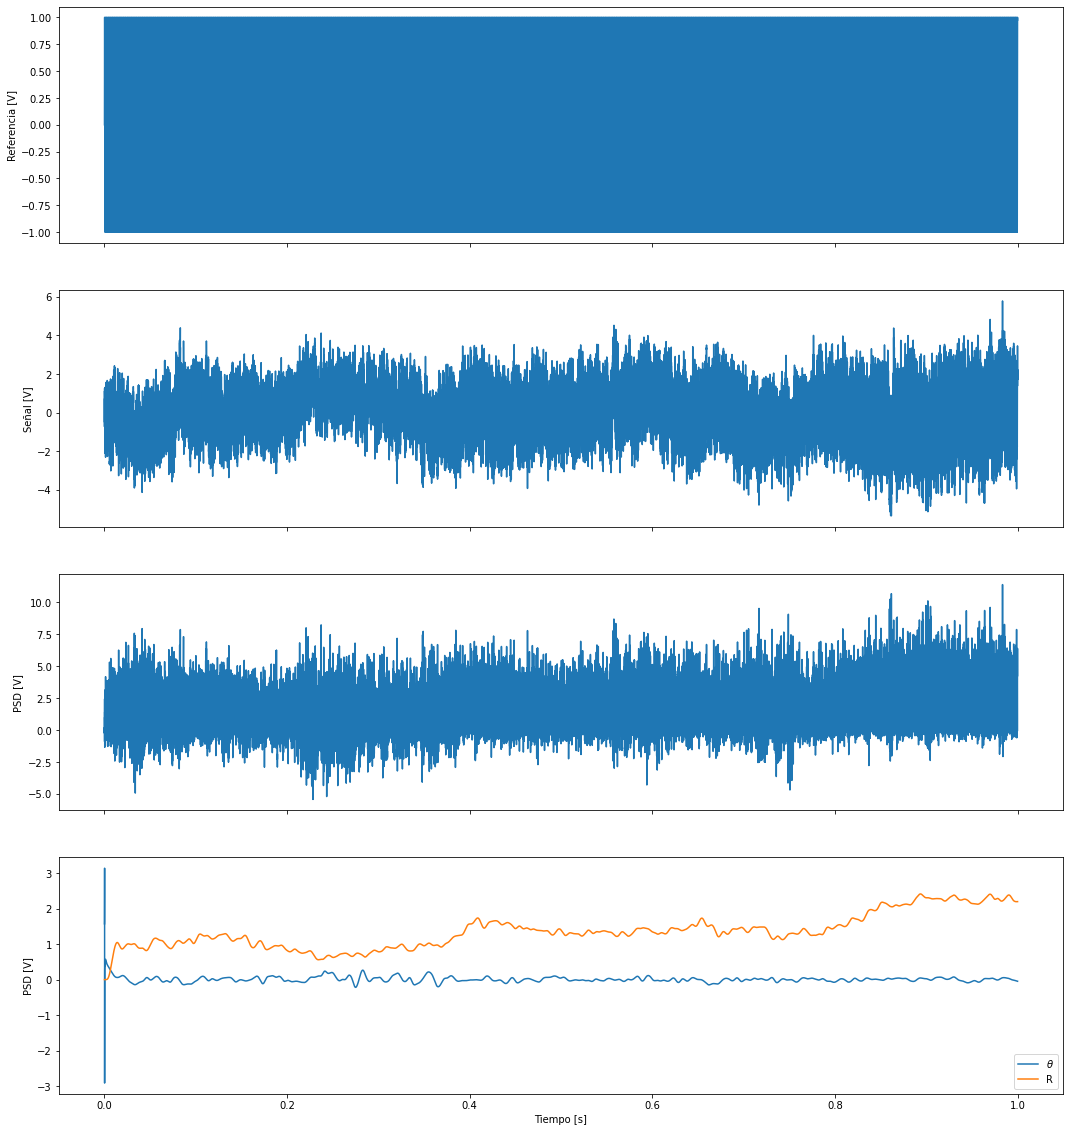

100000

In [5]:

f_samp = 100000
muestras = len(datos1)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 1400.3
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*datos1*referencia_x
PSDy=  2*datos1*referencia_y

fc = 15
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

fig, ax = plt.subplots(4,1, figsize=(18,20),num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,datos1, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')
plt.show()

len(PSDxFiltrada)

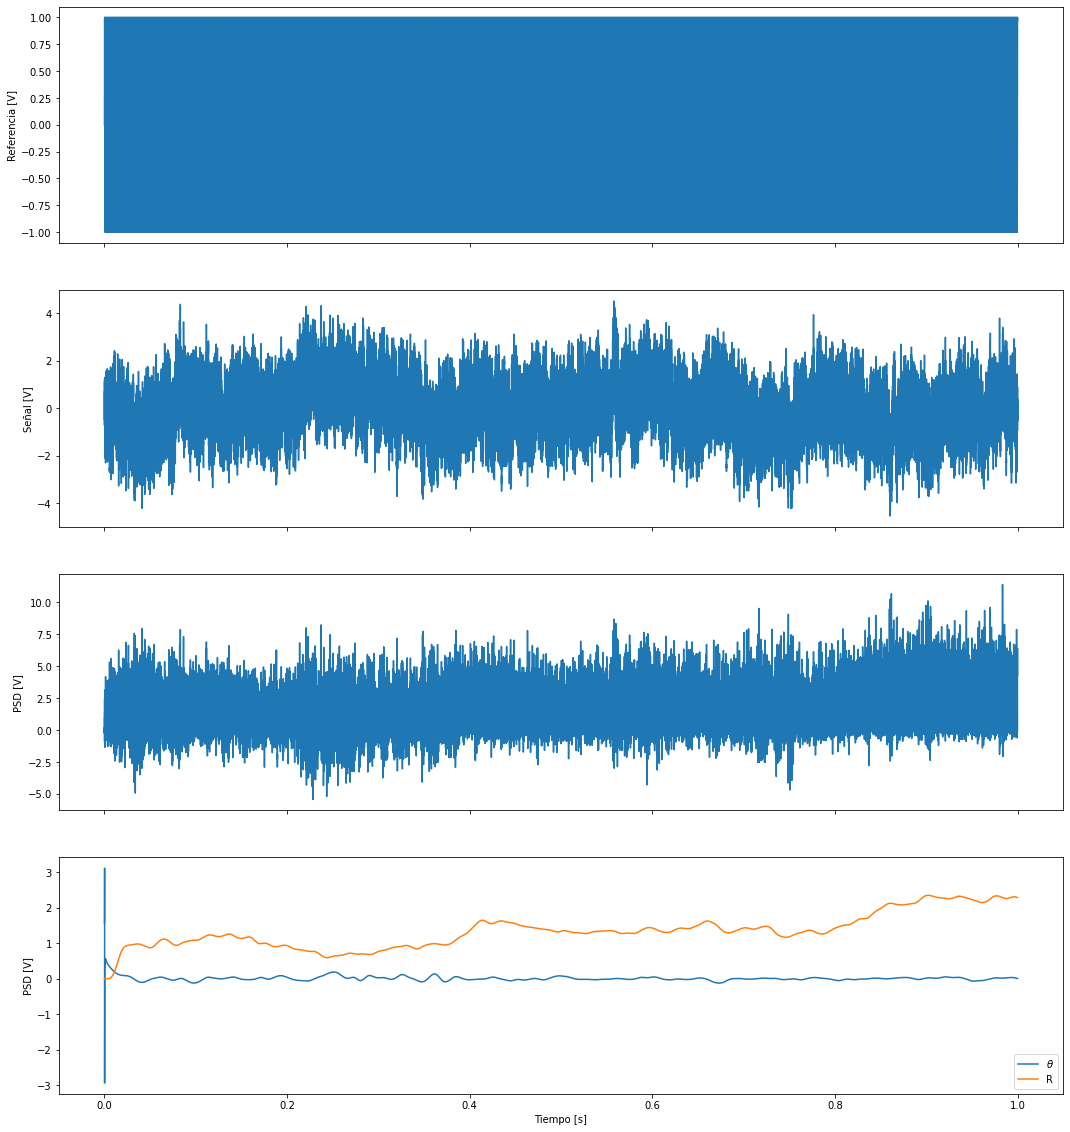

100000

In [9]:

f_samp = 100000
muestras = len(datos2)
T = 1/f_samp  #periodo
tiempo_max = muestras/f_samp
t = np.linspace(0, muestras-1,muestras)*T

F_ref = 1400.3
omega_ref=  F_ref*2*np.pi
referencia_x = np.array(np.sin(omega_ref*t))
referencia_y = np.array(np.cos(omega_ref*t))

PSDx = 2*datos1*referencia_x
PSDy=  2*datos1*referencia_y

fc = 8
orden = 6

# Filtrado de señal 
sos = signal.bessel(orden, 2*np.pi*fc, 'low', fs=f_samp,output='sos') # Generación de parametros del filrado
PSDxFiltrada= signal.sosfilt(sos,PSDx) # Filtrado
PSDyFiltrada= signal.sosfilt(sos,PSDy) # Filtrado

fig, ax = plt.subplots(4,1, figsize=(18,20),num=1, sharex=True)
ax[0].plot(t, referencia_x, label = 'referencia')
ax[0].set_ylabel('Referencia [V]')

ax[1].plot(t,datos2, label = 'señal')
ax[1].set_ylabel('Señal [V]')

ax[2].plot(t, PSDx, label = 'señal')
ax[2].set_ylabel('PSD [V]')

ax[3].plot(t,np.arctan2(PSDyFiltrada, PSDxFiltrada), label = r'$\theta$')
ax[3].plot(t, np.sqrt(PSDxFiltrada**2+PSDyFiltrada**2), label = 'R')
ax[3].set_ylabel('PSD [V]')
ax[3].set_xlabel('Tiempo [s]')
plt.legend(loc='lower right')
plt.show()

len(PSDxFiltrada)